In [10]:
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [11]:

pathPickle = "Pickles"
path_df = pathPickle+"/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

    
# features_train
path_features_train = pathPickle+"/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = pathPickle+"/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = pathPickle+"/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = pathPickle+"/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)
    
path_category_names = pathPickle+"/category_names.pickle"
with open(path_category_names, 'rb') as data:
    category_names = pickle.load(data)
    
path_category_codes = pathPickle+"/category_codes.pickle"
with open(path_category_codes, 'rb') as data:
    category_codes = pickle.load(data)

In [12]:
features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)

In [16]:
category_names

{0: 'MechProbe',
 1: 'Array',
 2: 'NotUS',
 3: 'HH',
 4: 'None',
 5: 'FullMachine',
 6: 'NDT',
 7: 'Cables',
 8: 'PseudoPiezo',
 9: 'PiezosNDT',
 10: 'NoClue',
 11: 'Boards',
 12: 'Unsure',
 13: 'WTF'}

In [23]:
# Fit and transform the features
n_components=2
mod = TSNE(n_components=2)
title = "t-SNE decomposition" 
principal_components = mod.fit_transform(features)

In [24]:
# Put them into a dataframe
df_features = pd.DataFrame(data=principal_components,columns=['PC1', 'PC2'])

# Now we have to paste each row's label and its meaning
# Convert labels array to df
df_labels = pd.DataFrame(data=labels,columns=['label'])

df_full = pd.concat([df_features, df_labels], axis=1)
df_full['label'] = df_full['label'].astype(str)

# And map labels
df_full['label_name'] = df_full['label']
df_full = df_full.replace({'label_name':category_names})

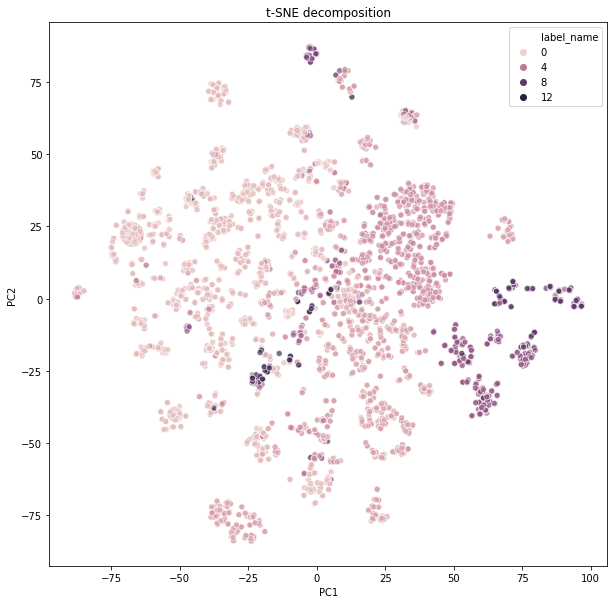

In [26]:
# Plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1',y='PC2',hue="label_name", data=df_full,alpha=.7).set_title(title);